## 13. Face2Emoji 모바일 웹앱 만들기

### Step 1. 표정 데이터로 MobileNet 학습하기

#### Step 1-1. 데이터 다운 받기
- https://www.kaggle.com/ahmedmoorsy/facial-expression

#### Step1-2. train, validation 데이터셋 구성하기

In [1]:
import numpy as np
import tqdm
import os

train_x = []
train_y = []
eval_x = []
eval_y = []

csv_path = os.getenv('HOME')+'/aiffel/tfjs_mobile/data/fer2013.csv'

with open(csv_path) as f:
  for line in tqdm.tqdm(f.read().splitlines()[1:]):
    emotion, pixels, usage = line.split(',')
    
    x = np.array(pixels.split(' ')).astype(float).reshape(48, 48, 1) / 255
    y = int(emotion)

    if usage == 'PrivateTest':
      eval_x.append(x)
      eval_y.append(y)
    else:
      train_x.append(x)
      train_y.append(y)

print('train : {}, eval :{}'.format(len(train_x), len(eval_x)))

100%|██████████| 35887/35887 [00:23<00:00, 1545.51it/s]

train : 32298, eval :3589


Angry


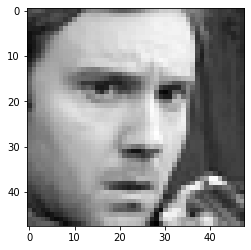

In [2]:
from matplotlib import pyplot as plt

LABELS = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

print(LABELS[train_y[0]])
plt.imshow(train_x[0].reshape([48, 48]), cmap='gray')

In [3]:
import tensorflow as tf

model = tf.keras.applications.MobileNetV2(input_shape = (48, 48, 1), weights = None, classes = 7)

model.compile(optimizer = tf.keras.optimizers.Adam(),
             loss = tf.keras.losses.CategoricalCrossentropy(),
             metrics = [tf.keras.metrics.CategoricalAccuracy()])

model.fit(np.stack(train_x),
         tf.keras.utils.to_categorical(train_y),
         epochs = 100,
         batch_size = 128,
         validation_data = (np.stack(eval_x),
                           tf.keras.utils.to_categorical(eval_y)))

Epoch 1/100
253/253 [==============================] - 31s 122ms/step - loss: 1.7869 - categorical_accuracy: 0.2694 - val_loss: 1.9140 - val_categorical_accuracy: 0.1744
Epoch 2/100
253/253 [==============================] - 7s 26ms/step - loss: 1.5984 - categorical_accuracy: 0.3754 - val_loss: 1.8974 - val_categorical_accuracy: 0.1744
Epoch 3/100
253/253 [==============================] - 7s 26ms/step - loss: 1.4758 - categorical_accuracy: 0.4312 - val_loss: 1.8976 - val_categorical_accuracy: 0.1655
Epoch 4/100
253/253 [==============================] - 7s 26ms/step - loss: 1.3944 - categorical_accuracy: 0.4621 - val_loss: 1.8947 - val_categorical_accuracy: 0.1655
Epoch 5/100
253/253 [==============================] - 7s 27ms/step - loss: 1.3235 - categorical_accuracy: 0.4937 - val_loss: 1.8854 - val_categorical_accuracy: 0.1655
Epoch 6/100
253/253 [==============================] - 7s 27ms/step - loss: 1.2587 - categorical_accuracy: 0.5205 - val_loss: 1.9012 - val_categorical_accurac

253/253 [==============================] - 7s 27ms/step - loss: 0.1589 - categorical_accuracy: 0.9449 - val_loss: 3.8876 - val_categorical_accuracy: 0.4492
Epoch 50/100
253/253 [==============================] - 7s 27ms/step - loss: 0.1569 - categorical_accuracy: 0.9454 - val_loss: 3.7100 - val_categorical_accuracy: 0.4533
Epoch 51/100
253/253 [==============================] - 7s 27ms/step - loss: 0.1514 - categorical_accuracy: 0.9463 - val_loss: 3.9812 - val_categorical_accuracy: 0.4712
Epoch 52/100
253/253 [==============================] - 7s 27ms/step - loss: 0.1493 - categorical_accuracy: 0.9495 - val_loss: 3.7734 - val_categorical_accuracy: 0.4776
Epoch 53/100
253/253 [==============================] - 7s 27ms/step - loss: 0.1513 - categorical_accuracy: 0.9472 - val_loss: 3.7655 - val_categorical_accuracy: 0.4845
Epoch 54/100
253/253 [==============================] - 7s 27ms/step - loss: 0.1428 - categorical_accuracy: 0.9508 - val_loss: 3.8432 - val_categorical_accuracy: 0.4659

253/253 [==============================] - 7s 27ms/step - loss: 0.0867 - categorical_accuracy: 0.9694 - val_loss: 3.7841 - val_categorical_accuracy: 0.5104
Epoch 98/100
253/253 [==============================] - 7s 27ms/step - loss: 0.0819 - categorical_accuracy: 0.9711 - val_loss: 3.5232 - val_categorical_accuracy: 0.5071
Epoch 99/100
253/253 [==============================] - 7s 27ms/step - loss: 0.0845 - categorical_accuracy: 0.9698 - val_loss: 3.6723 - val_categorical_accuracy: 0.5054
Epoch 100/100
253/253 [==============================] - 7s 27ms/step - loss: 0.0819 - categorical_accuracy: 0.9696 - val_loss: 3.8136 - val_categorical_accuracy: 0.5035


In [4]:
import os
model_path = os.getenv('HOME') + '/aiffel/tfjs_mobile/model.h5'
model.save(model_path)

- Face2Emoji web app url: https://nevermet.github.io/tfjs_mobile/
- 100 epoch를 완료하는 동안, cateogical_accuracy : 96%, val_categorical_accuracy : 50% 이상 달성